# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
valid_cities = []
valid_lat = []
valid_lng = []
valid_max_temp = []
valid_humidity = []
valid_cloudiness = []
valid_wind_speed = []
valid_country = []
valid_date = []
set_number = 1
number_in_set = 1

print("Beginning Data Retrieval\n-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"

for counter,value in enumerate(cities, 1):
    city_name = cities[counter-1]
    try:
        # Create search query, make request and store in json
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city_name
        city_json = requests.get(query_url).json()
        valid_cities.append(city_json["name"])
        valid_lat.append(city_json["coord"]["lat"])
        valid_lng.append(city_json["coord"]["lon"])
        valid_max_temp.append(city_json["main"]["temp_max"])
        valid_humidity.append(city_json["main"]["humidity"])
        valid_cloudiness.append(city_json["clouds"]["all"])
        valid_wind_speed.append(city_json["wind"]["speed"])
        valid_country.append(city_json["sys"]["country"])
        valid_date.append(city_json["dt"])
        print(f"Processing Record {number_in_set} of Set {set_number} | {city_json['name']}")
        # Handle cities that are not found
    except KeyError:
        print(f"Processing Record {number_in_set} of Set {set_number} | {city_name}")
        print("City not found. Skipping...")
    number_in_set += 1
    
    if number_in_set ==51:
        set_number += 1
        number_in_set = 1

print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Cururupu
Processing Record 2 of Set 1 | Bathsheba
Processing Record 3 of Set 1 | Tuktoyaktuk
Processing Record 4 of Set 1 | Klaksvík
Processing Record 5 of Set 1 | Hūn
Processing Record 6 of Set 1 | New Norfolk
Processing Record 7 of Set 1 | East London
Processing Record 8 of Set 1 | Jonuta
Processing Record 9 of Set 1 | Lusaka
Processing Record 10 of Set 1 | Bluff
Processing Record 11 of Set 1 | Rikitea
Processing Record 12 of Set 1 | Bredasdorp
Processing Record 13 of Set 1 | Ponta do Sol
Processing Record 14 of Set 1 | Yellowknife
Processing Record 15 of Set 1 | Cherskiy
Processing Record 16 of Set 1 | Mataura
Processing Record 17 of Set 1 | Puerto Ayora
Processing Record 18 of Set 1 | Enumclaw
Processing Record 19 of Set 1 | Kahului
Processing Record 20 of Set 1 | Ushuaia
Processing Record 21 of Set 1 | Chanika
Processing Record 22 of Set 1 | Alice Springs
Processing Record 23 of Set 1 | Hong Kong

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
valid_max_temp_f = [round((i-273.15)*9/5+32,2) for i in valid_max_temp]
city_weather = {"City": valid_cities,
               "Lat": valid_lat,
               "Lng": valid_lng,
               "Max Temp": valid_max_temp_f,
               "Humidity": valid_humidity,
               "Cloudiness": valid_cloudiness,
               "Wind Speed": valid_wind_speed,
               "Country": valid_country,
               "Date": valid_date}
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cururupu,-1.83,-44.87,72.12,95,47,0.64,BR,1595141515
1,Bathsheba,13.22,-59.52,80.60,78,40,5.70,BB,1595140961
2,Tuktoyaktuk,69.45,-133.04,38.57,89,100,3.80,CA,1595140951
3,Klaksvík,62.23,-6.59,48.20,87,90,6.20,FO,1595140950
4,Hūn,29.13,15.95,80.74,43,0,1.87,LY,1595141020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.918394,16.595931,69.411259,70.644161,48.728102,3.437080,1.595141e+09
std,34.169183,93.239657,13.852980,20.543956,40.083106,2.374564,2.725675e+02
min,-54.800000,-179.170000,30.200000,9.000000,0.000000,0.080000,1.595141e+09
25%,-8.802500,-66.997500,59.000000,60.000000,1.000000,1.635000,1.595141e+09
50%,22.625000,19.980000,70.015000,74.000000,46.000000,3.000000,1.595141e+09
75%,49.765000,96.280000,80.010000,86.000000,90.000000,4.600000,1.595142e+09
max,78.220000,179.320000,109.400000,100.000000,100.000000,15.770000,1.595142e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_weather_df.loc[city_weather_df["Humidity"]>100]
humidity_over_100.index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"]<=100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cururupu,-1.83,-44.87,72.12,95,47,0.64,BR,1595141515
1,Bathsheba,13.22,-59.52,80.60,78,40,5.70,BB,1595140961
2,Tuktoyaktuk,69.45,-133.04,38.57,89,100,3.80,CA,1595140951
3,Klaksvík,62.23,-6.59,48.20,87,90,6.20,FO,1595140950
4,Hūn,29.13,15.95,80.74,43,0,1.87,LY,1595141020
...,...,...,...,...,...,...,...,...,...
543,Ust-Nera,64.57,143.20,57.56,77,93,2.70,RU,1595140992
544,Caravelas,-17.71,-39.25,69.03,79,4,1.92,BR,1595140848
545,Quatre Cocos,-20.21,57.76,72.00,64,75,6.70,MU,1595141259
546,Trairi,-3.28,-39.27,74.28,76,77,5.34,BR,1595141329


In [10]:
# Extract relevant fields from the data frame
clean_city_data.insert(loc = 0, column="City ID", value = clean_city_data.index)
# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/city_data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.
* After each plot add a sentence or too explaining what the code is and analyzing.

## Latitude vs. Temperature Plot

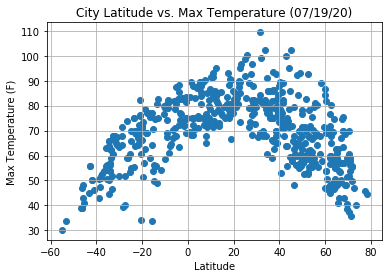

In [11]:
city_lat = clean_city_data["Lat"]
city_max_temp = clean_city_data["Max Temp"]
plt.scatter(city_lat, city_max_temp)
plt.title("City Latitude vs. Max Temperature (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Fig1.png")

This plot shows the relationship between latitude and max temperature of selected cities. It visualizes the trend of temperature changes along the latitude.

## Latitude vs. Humidity Plot

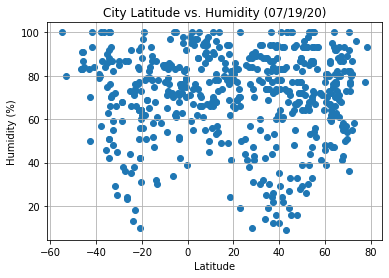

In [12]:
city_humidity = clean_city_data["Humidity"]
plt.scatter(city_lat, city_humidity)
plt.title("City Latitude vs. Humidity (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Fig2.png")

This plot shows the relationship between latitude and humidity of selected cities. It visualizes the trend of humidity changes along the latitude.

## Latitude vs. Cloudiness Plot

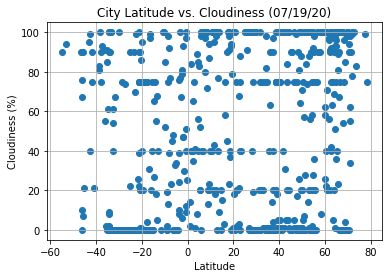

In [13]:
city_cloudiness = clean_city_data["Cloudiness"]
plt.scatter(city_lat, city_cloudiness)
plt.title("City Latitude vs. Cloudiness (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Fig3.png")

This plot shows the relationship between latitude and cloudiness of selected cities. It visualizes the trend of cloudiness changes along the latitude.

## Latitude vs. Wind Speed Plot

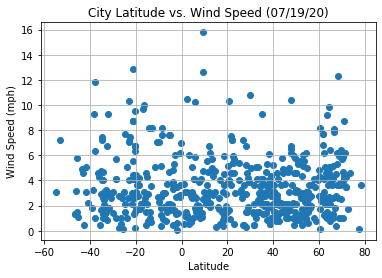

In [14]:
city_wind_speed = clean_city_data["Wind Speed"]
plt.scatter(city_lat, city_wind_speed)
plt.title("City Latitude vs. Wind Speed (07/19/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/Fig4.png")

This plot shows the relationship between latitude and wind speed of selected cities. It visualizes the trend of wind speed changes along the latitude.

## Linear Regression
* After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
import scipy.stats as st

def linear_regression(a,b):
    correlation = st.pearsonr(a, b)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(a, b)
    regress_values = a * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(a, b)
    plt.plot(a,regress_values,"r-")
    plt.annotate(line_eq,(a.min(),b.min()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {correlation[0]**2}")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data.loc[clean_city_data["Lat"]>=0]
southern_df = clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4279834611983273


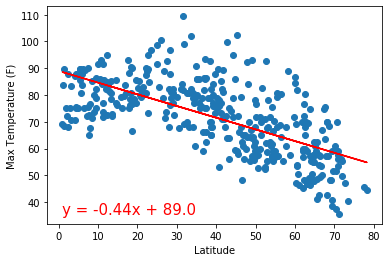

In [17]:
a = northern_df["Lat"]
b = northern_df["Max Temp"]
linear_regression(a, b)
plt.ylabel("Max Temperature (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5345409414512728


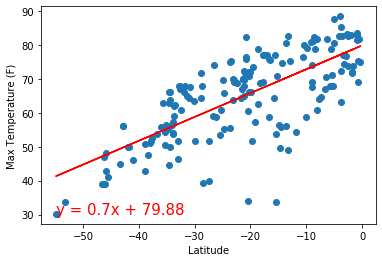

In [18]:
a = southern_df["Lat"]
b = southern_df["Max Temp"]
linear_regression(a, b)
plt.ylabel("Max Temperature (F)")
plt.show()

In the Northern Hemisphere, the peak of max temperature of selected cities appears when Latitude is around 25. This is because during Summer time (as of now), the Sun is directly shining at the Tropic of Cancer (latitude = 23.5). In the Southern Hemisphere, the max temperature increases when moving toward equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0032667296272150302


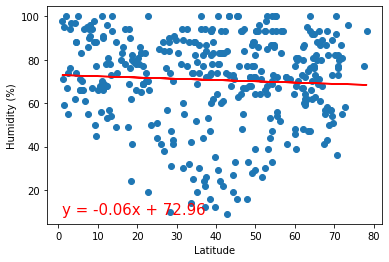

In [19]:
a = northern_df["Lat"]
b = northern_df["Humidity"]
linear_regression(a, b)
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0068848788641410405


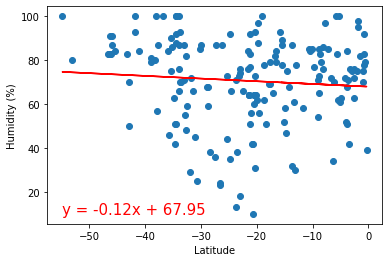

In [20]:
a = southern_df["Lat"]
b = southern_df["Humidity"]
linear_regression(a, b)
plt.ylabel("Humidity (%)")
plt.show()

The Northern Hemisphere is more humid than the Southern Hemisphere, probably because it receives more rain falls.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005631219258755289


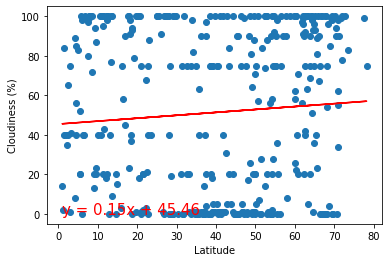

In [21]:
a = northern_df["Lat"]
b = northern_df["Cloudiness"]
linear_regression(a, b)
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0090779324980649


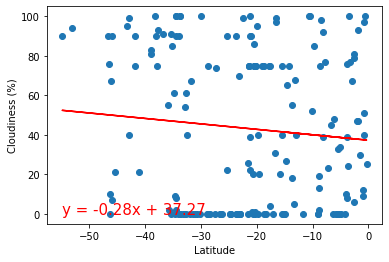

In [22]:
a = southern_df["Lat"]
b = southern_df["Cloudiness"]
linear_regression(a, b)
plt.ylabel("Cloudiness (%)")
plt.show()

The Northern Hemisphere is more cloudy than the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0014224295493526005


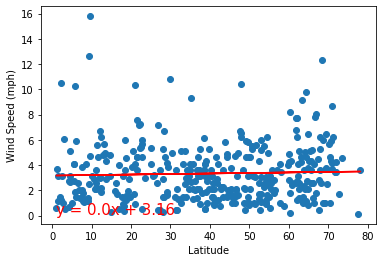

In [23]:
a = northern_df["Lat"]
b = northern_df["Wind Speed"]
linear_regression(a, b)
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 9.4378593654592e-07


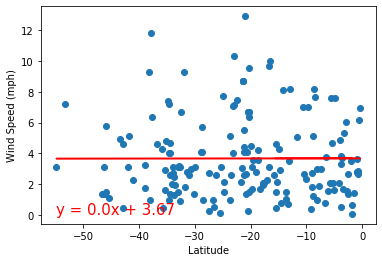

In [24]:
a = southern_df["Lat"]
b = southern_df["Wind Speed"]
linear_regression(a, b)
plt.ylabel("Wind Speed (mph)")
plt.show()

The Northern Hemisphere is a little more windy than the Southern Hemisphere.